# Data Analysis

### *J.A. Hernando, Particle Physics Department, USC, 2018*

## Appendix - Matplotlib I

In [1]:
import time
print(' Last revision {}'.format(time.asctime()))

 Last revision Tue Jan 30 12:37:13 2018


## Matplotlib

Matplotlib is a Python library to display plots, graphs, histograms. 

Items:

  1. Figures and layout
  2. Functions
  3. Histograms
  4. Miscellaneous  

In [2]:
# general imports
%matplotlib inline

In [3]:
# the general imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

---
## 1. Figures and layout


### 1.1 Style

To plot have imported pyplot ad plt, (see http://matplotlib.org/api/pyplot_api.html).

And set the style 'ggplot'. There are several styles predefined (see http://matplotlib.org/users/style_sheets.html) or  do *print(matplotlib.style.available)*

The 'ggplot' is designed for simplicity and 'bmh' for showing scienfic results. 

In [4]:
print(matplotlib.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


The parameters of MathPlotLib are defined at:

In [5]:
# list of all paramets of MatPlotLib
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
     


### 1. 2 Figures, axes and layout

The **figure** is the canvas where mpl draws the plots. See (http://matplotlib.org/api/figure_api.html).

The size of the figure can be controled by the *figsize=(8, 6)* and the quality by *dpi=100* arguments.

Figures can containt **axes** where plots can be displayed. In principle *axes* are rectangles. One can add an axis indicating where in the figure to locate it with the method *add_axes(left, bottom, width, hight)* where the arguments are fractions of the figure width and hight. You can add many axes as you want. (See http://matplotlib.org/api/axes_api.html) 

Plots are drawn in axes.

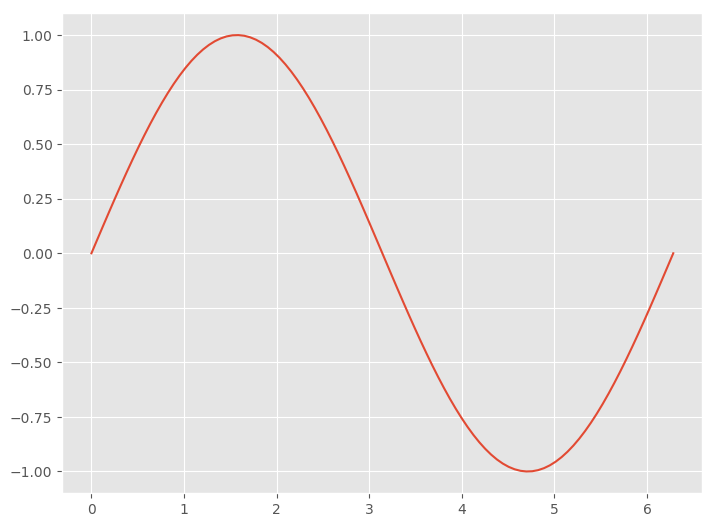

In [6]:
# some data to plot
xs = np.linspace(0., 2*np.pi, 100)
ys = np.sin(xs)
zs = np.tan(xs)/(1+abs(np.tan(xs)))

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(xs, ys);

The *subplots(nx, ny)* divides the figure in $nx * ny$ subplots or axes. It returns the figure and an array with the axis. The method *subpplot(nx, ny, n)* returns the axes in the n-position of the $(nx,  ny)$ array. 

Axes can be overimposed in previous layouts!

In the following example we add several subplots into one figure, add labels and titles. 

The method *tight_layout()* automatically re-arrange the subplots and text in the figure that they do not overlap! 


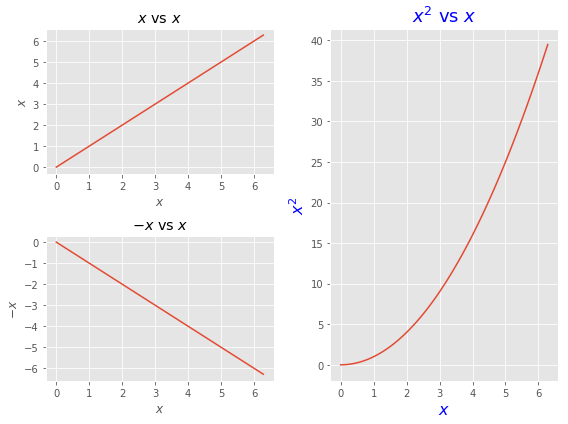

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
ax0, ax1 = axs[0][0], axs[1][0]
ax0.plot(xs, xs);
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$x$')
ax0.set_title(r'$x$ vs $x$')
ax1.plot(xs, -1.*xs);
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$-x$')
ax1.set_title(r'$-x$ vs $x$')

ax = plt.subplot(1, 2, 2)
ax.plot(xs, xs*xs)
ax.set_xlabel(r'$x$', fontsize=16, color='blue')
ax.set_ylabel(r'$x^2$', fontsize=16, color='blue')
ax.set_title(r'$x^2$ vs $x$', fontsize=18, color='blue')

fig.tight_layout();

### Title and text

You can add labels and *titles* to an *axes* with *set_xlabel(), set_ylabel(), set_title()*.

The sizefond and style are set in the *matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})*. They cna be modified with the *update({key:value})* function.

Matplotlib supports $\LaTeX$, inserted $$ in the text. Nevertheless you need to add *r'string'* to be valid!

Ticks can be controlled by 


In [8]:
# change the font-size
# matplotlib.rcParams.update({'font.family':'Palatino', 'font.size':11})
matplotlib.rcParams.update({'font.family':'Times New Roman', 'font.size':11})

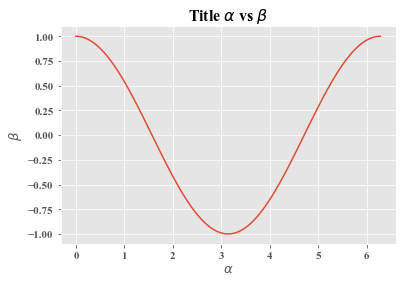

In [9]:
xs = np.linspace(0., 2*np.pi, 100)
ys = np.cos(xs)

fig, ax = plt.subplots()

ax.plot(xs, ys)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_title(r'Title $\alpha$ vs $\beta$');

### 1.3  Legends, text, lines and markers

We can associated each plot to a style: line, color, marker, and a legend.

The arguments:
1. color (c): 'black', 'red', 'blue', 'green', or an 3-tuple (RGB) index
2. marker : '+', 'o', '\*', 's', ',', '.', '1', '2'
3. linestyle (ls): ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
4. linewifth (lw): 0.25, 1., 1.4, ...
5. markerwidth: 1, 2, 3, 
6. alpha (transparencia): [0., 1.]

And the label argument!

To display the legend, apply the method *legend(loc)* to the axes. There are four pre-defined locations loc=[1, 2, 3, 4] for the corners of the rectangle. 

Text can be placed in the *axes* with the *text()* method.
ax.text(3.50, 22.0, r"$y=x^2$", fontsize=20, color="blue")

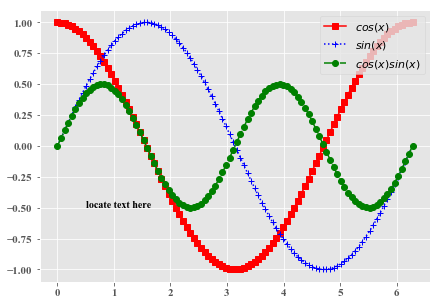

In [10]:
xs = np.linspace(0., 2.*np.pi, 100)
cs = np.cos(xs)
ss = np.sin(xs)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(xs, cs, color='red', marker='s', linestyle='-', label=r'$cos(x)$')
ax.plot(xs, ss, c='blue', marker='+', ls=':', label=r'$sin(x)$')
ax.plot(xs, cs*ss, 'go-.', label=r'$cos(x)sin(x)$')
ax.legend(loc=1)

ax.text(0.5, -0.5, "locate text here", fontsize=10, color='black');

### 1.4 Ticks, Grid, Splines, Axes

The range in the plot can be controlled by the *set_xlim([x0, x1])* and *set_ylim([y0, y1])* methods of *axes*.

Ticks can be set with the $set_xticks(list)$ and *set_xticklabels(list)*, with the positions and the label ticks.

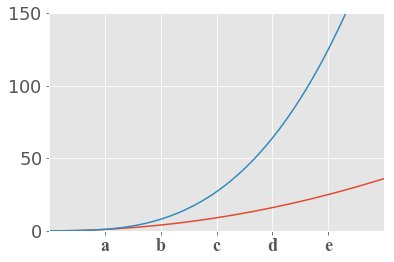

In [11]:
fig, ax = plt.subplots()

x = np.linspace(-1., 6, 100)

ax.plot(x, x**2, x, x**3)
ax.set_xlim([0., 6.])
ax.set_ylim([0., 150.])

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'], fontsize=18);

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.0f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

To access the sides of the rectangle with the *spines[location]* members, *location=bottom, top, left, right*. They are lines that can change style, color, width.

The xaxis or yaxis are *axis* and members of axes *ax.xaxis, ax.yaxis*. (See http://matplotlib.org/api/axis_api.html) They have methods to deal with ticks too. 

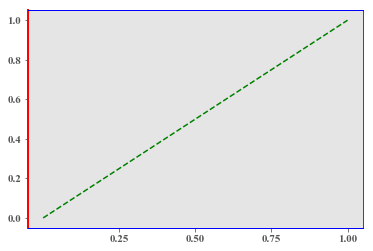

In [12]:
fig, ax = plt.subplots()

xs = np.linspace(0., 1., 100)
ax.plot(xs, xs, 'g--')

ax.grid(False)
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('red') # if none there is no spine!
ax.xaxis.set_ticks([0.25, 0.5, 0.75, 1.]);


We can locate the splines in any place is the axes. In particular to locate them in the $(0, 0)$

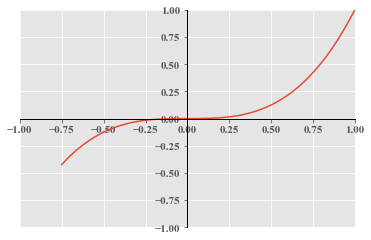

In [13]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks([-1., -0.75, -0.5, -0.25, 0., 0.25, 0.5, 0.75, 1.])
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks([-1., -0.75, -0.5, -0.25, 0., 0.25, 0.5, 0.75, 1.])
ax.spines['left'].set_color('black')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.set_xlim([-1., 1.])
ax.set_ylim([-1., 1.])
ax.plot(xx, xx**3);

### 1.5 Twin plots

You can create a Twin plot (share the x-axis but the y-axis is on the right spline) with the *twinx(), twiny()* methods.

The grid can be displayed and parameters changed using the method *grid()* to *axes*.

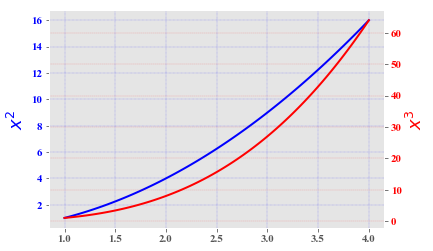

In [14]:
fig, ax1 = plt.subplots()

x = np.linspace(1., 4., 100)

ax1.grid(True, color='blue', linestyle=':', linewidth=0.3)
ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"$x^2$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.grid(True, c='red', ls=':', linewidth=0.25)
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"$x^3$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### 1.6 Save figures

To save a plot do, apply *savefig(filename)* to the figure.

These are the supported backends *print(matplotlib.rcsetup.all_backends)*

To save some plots in the same pdf file first, create a *pdf* object and attatch figuress to it.

In [15]:
print(matplotlib.rcsetup.all_backends)

fig.savefig('fig.png')
#from IPython.Display import Image
#Image('img/fig.png')

['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg', 'agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']


You can save several figures into one pdf file. For that crate a *pdf* object.

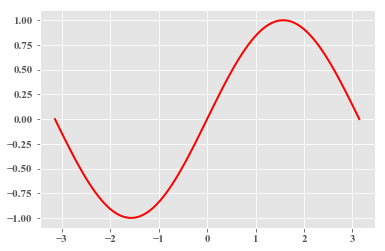

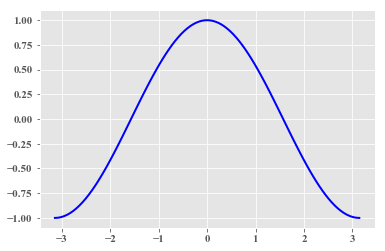

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('temp.pdf')

xs = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots()
ax.plot(xs, np.sin(xs), color='red', lw=2.)
pdf.savefig(fig)

fig, ax = plt.subplots()
ax.plot(xs, np.cos(xs), color='blue', lw=2.)
pdf.savefig(fig);